**Segmentation des données et visualisation**

# **Partie A**

***1) Construire la matrice de données X ∈ Rp×c avec c étant le nombre de
caractérisitques statistiques extraites.***

In [1]:
#libraries
import pandas as pd

import numpy as np
from numpy import linalg as LA

from math import *

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from scipy.spatial import distance_matrix




In [2]:
#connect google drive to the notebook
from google.colab import drive

In [3]:
#mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [101]:
#read the json file and convert the data into a dataframe
df = pd.read_json('/content/drive/MyDrive/Books_5.json',lines=True,nrows=200000)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5,A Modern Rumi,1033948800,"10 7, 2002"
...,...,...,...,...,...,...,...,...,...
199995,A15P0E7IYRBXAX,0060975776,Tom Badyna,"[15, 22]","I tried to like this collection, and there wer...",2,Just Not Sure,1208390400,"04 17, 2008"
199996,A1WX7UUXN4WNL0,0060975776,T. Tucker,"[3, 3]","I love this book. The ending lines about ""I n...",5,brilliant and beautiful,1111276800,"03 20, 2005"
199997,A2R6LKLYSJIQH8,0060975776,T T Walker,"[0, 0]",I don't think that Jesus' Son should be put wi...,4,Left me wanting more,1358380800,"01 17, 2013"
199998,A3QYDL5CDNYN66,0060975776,"Verita ""a devoted reader""","[0, 0]",Stories involving drug addiction. Johnson's gr...,5,Spectacularly accurate and beautifully written,1285372800,"09 25, 2010"


In [102]:
def matrice_scores(df): 
    df1=df[['asin','overall']]
    S=df1['asin'].unique().size
    df0=df1['asin'].unique()
    col=df['asin'].unique()
    df3 = pd.DataFrame(columns=col,index=range(1,6))
    for i in df0:

        df2=df1[df1.asin==i]
        l=pd.value_counts(df2['overall'],sort=True,ascending=True)
        l.sort_index()
        df3[i]=l
    df3[np.isnan(df3)] = 0

    return df3

In [103]:
df0=df[['asin','overall']]
df1=matrice_scores(df0)
df1
df1


,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0060974990,0060975008,0060975091,0060975199,0060975407,0060975504,0060975547,0060975598,0060975768,0060975776
1,6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,2,1,1.0,1.0,2.0,0.0,0.0,4,5
2,4,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1,1,0.0,0.0,0.0,1.0,0.0,2,3
3,8,2.0,0.0,0.0,1.0,0.0,2.0,0.0,5.0,1.0,...,0.0,3,3,0.0,2.0,5.0,2.0,3.0,6,1
4,15,10.0,2.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,...,6.0,2,3,2.0,3.0,10.0,5.0,5.0,39,16
5,173,2.0,13.0,7.0,5.0,13.0,9.0,3.0,6.0,4.0,...,20.0,19,6,5.0,4.0,16.0,8.0,10.0,169,46


In [104]:
def appreciation(D):
  for j in D.columns:

      if D.iloc[0][j]>3.5:
            D.loc[-1,j]=0
      elif D.iloc[0][j]<2.5:
            D.loc[-1,j]=2
      else:
            D.loc[-1,j]=1
  return D

In [105]:
df0=df0.groupby('asin').agg(['mean','std','median'])
df0=df0.T
df0=appreciation(df0)

df0.T

overall                    -1
                mean       std median     
asin                                      
000100039X  4.674757  0.875712    5.0  0.0
0001055178  3.555556  0.983524    4.0  0.0
0001473123  4.625000  1.024695    5.0  0.0
0001473727  5.000000  0.000000    5.0  0.0
0001473905  4.666667  0.816497    5.0  0.0
...              ...       ...    ...  ...
0060975504  4.151515  1.093195    4.0  0.0
0060975547  4.250000  0.930949    4.5  0.0
0060975598  4.388889  0.777544    5.0  0.0
0060975768  4.668182  0.742627    5.0  0.0
0060975776  4.338028  1.170393    5.0  0.0

[5894 rows x 4 columns]

In [106]:
df1_Moins_Apprécié=df1.loc[1]+df1.loc[2]
df1_Apprécié=df1.loc[4]+df1.loc[5]
df1_Neutre=df1.loc[3]
df1_Reviews=df1.loc[1]+df1.loc[2]+df1.loc[3]+df1.loc[4]+df1.loc[5]

In [107]:
Statistiques=pd.DataFrame(columns=['Apprécié','Neutre','Moins_Apprécié','Nombre_Votes'])
Statistiques['Apprécié']=df1_Apprécié
Statistiques['Moins_Apprécié']=df1_Moins_Apprécié
Statistiques['Neutre']=df1_Neutre
Statistiques['Nombre_Votes']=df1_Reviews
Statistiques

,Apprécié,Neutre,Moins_Apprécié,Nombre_Votes
000100039X,188.0,8.0,10.0,206.0
0001055178,12.0,2.0,4.0,18.0
0001473123,15.0,0.0,1.0,16.0
0001473727,7.0,0.0,0.0,7.0
0001473905,5.0,1.0,0.0,6.0
...,...,...,...,...
0060975504,26.0,5.0,2.0,33.0
0060975547,13.0,2.0,1.0,16.0
0060975598,15.0,3.0,0.0,18.0
0060975768,208.0,6.0,6.0,220.0


In [108]:
Statistique1=pd.concat([Statistiques.T,df0[0:3]]).T
Statistique1

,Apprécié,Neutre,Moins_Apprécié,Nombre_Votes,"(overall, mean)","(overall, std)","(overall, median)"
000100039X,188.0,8.0,10.0,206.0,4.674757,0.875712,5.0
0001055178,12.0,2.0,4.0,18.0,3.555556,0.983524,4.0
0001473123,15.0,0.0,1.0,16.0,4.625000,1.024695,5.0
0001473727,7.0,0.0,0.0,7.0,5.000000,0.000000,5.0
0001473905,5.0,1.0,0.0,6.0,4.666667,0.816497,5.0
...,...,...,...,...,...,...,...
0060975504,26.0,5.0,2.0,33.0,4.151515,1.093195,4.0
0060975547,13.0,2.0,1.0,16.0,4.250000,0.930949,4.5
0060975598,15.0,3.0,0.0,18.0,4.388889,0.777544,5.0
0060975768,208.0,6.0,6.0,220.0,4.668182,0.742627,5.0


In [109]:
Statistique2=pd.DataFrame(columns=['Apprécié','Neutre','Moins_Apprécié','Classe','Nombre_Votes'])
Statistique2['Apprécié']=df1_Apprécié
Statistique2['Moins_Apprécié']=df1_Moins_Apprécié
Statistique2['Neutre']=df1_Neutre
Statistique2['Nombre_Votes']=df1_Reviews
Statistique2['Classe']=df0.T[-1]
Statistique2=pd.concat([Statistique2.T,df0[0:3]]).T


***2) Effectuer une segmentation basée sur les k-moyennes avec k = 3 en utilisant dans un premier temps la distance euclidienne et ensuite la similarité
cosinus pour comparer les objets.***



```
# K-means avec distance euclidienne
```



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

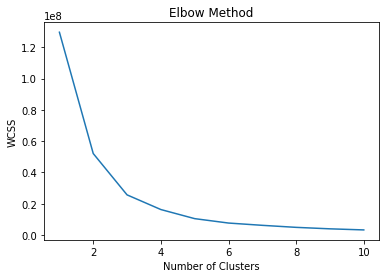

In [110]:
 #ELBOW

# Calculating WCSS values for 1 to 10 clusters

wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(Statistique1)
  wcss.append(kmeans_model.inertia_)


 # Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

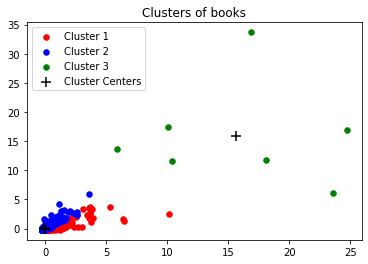

In [14]:
scaler = StandardScaler()
X1 = scaler.fit_transform(Statistique1)
# Training the KMeans model with n_clusters=3
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X1)
# Visualising the clusters
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

In [15]:
X = Statistique1.iloc[:, [3,4]]
X

,Nombre_Votes,"(overall, mean)"
000100039X,206.0,4.674757
0001055178,18.0,3.555556
0001473123,16.0,4.625000
0001473727,7.0,5.000000
0001473905,6.0,4.666667
...,...,...
0060534095,5.0,4.800000
0060534214,55.0,3.872727
0060534249,38.0,4.052632
0060534389,66.0,4.075758


In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

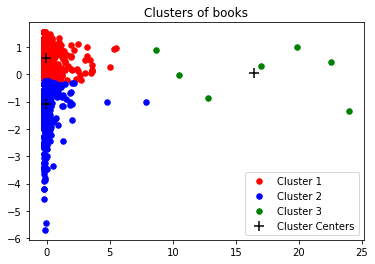

In [17]:
# Training the KMeans model with n_clusters=3
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')



```
# KMeans avec similarité cosinus
```



In [111]:
Stat=Statistique1.T[0:3].T
Stat

,Apprécié,Neutre,Moins_Apprécié
000100039X,188.0,8.0,10.0
0001055178,12.0,2.0,4.0
0001473123,15.0,0.0,1.0
0001473727,7.0,0.0,0.0
0001473905,5.0,1.0,0.0
...,...,...,...
0060975504,26.0,5.0,2.0
0060975547,13.0,2.0,1.0
0060975598,15.0,3.0,0.0
0060975768,208.0,6.0,6.0


In [19]:

similarity_matrix = cosine_similarity(Stat)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640
0,1.000000,0.958082,0.999008,0.997688,0.986640,0.998934,0.986640,0.946039,0.892754,0.978196,...,0.979238,0.982905,0.997688,0.996626,0.996346,0.997688,0.981474,0.988518,0.991921,0.995979
1,0.958082,1.000000,0.955744,0.937043,0.949474,0.956915,0.949474,0.986025,0.894967,0.946943,...,0.992345,0.968857,0.937043,0.966691,0.969928,0.937043,0.994713,0.983366,0.970521,0.948768
2,0.999008,0.955744,1.000000,0.997785,0.978409,0.999989,0.978409,0.951125,0.872221,0.967994,...,0.980592,0.974485,0.997785,0.992299,0.992154,0.997785,0.980735,0.983277,0.985927,0.991209
3,0.997688,0.937043,0.997785,1.000000,0.980581,0.997459,0.980581,0.928477,0.874157,0.970143,...,0.965824,0.971666,1.000000,0.990375,0.989368,1.000000,0.967186,0.976481,0.983169,0.993409
4,0.986640,0.949474,0.978409,0.980581,1.000000,0.978089,1.000000,0.910446,0.952424,0.998868,...,0.957038,0.996772,0.980581,0.995421,0.994613,0.980581,0.966909,0.990536,0.996818,0.996597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,0.997688,0.937043,0.997785,1.000000,0.980581,0.997459,0.980581,0.928477,0.874157,0.970143,...,0.965824,0.971666,1.000000,0.990375,0.989368,1.000000,0.967186,0.976481,0.983169,0.993409
2637,0.981474,0.994713,0.980735,0.967186,0.966909,0.981535,0.966909,0.985620,0.891297,0.961193,...,0.998885,0.978571,0.967186,0.984160,0.986321,0.967186,1.000000,0.992097,0.984164,0.971627
2638,0.988518,0.983366,0.983277,0.976481,0.990536,0.983595,0.990536,0.956661,0.935360,0.988159,...,0.985900,0.996631,0.976481,0.996262,0.997173,0.976481,0.992097,1.000000,0.998147,0.989343
2639,0.991921,0.970521,0.985927,0.983169,0.996818,0.985957,0.996818,0.940407,0.940524,0.994306,...,0.976914,0.998293,0.983169,0.998967,0.999088,0.983169,0.984164,0.998147,1.000000,0.995825


In [20]:
#supp
scaler = StandardScaler()
X_cos = scaler.fit_transform(similarity_df)

Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

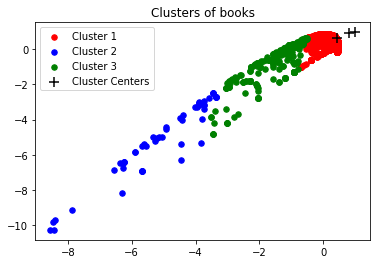

In [21]:
# Training the KMeans model with n_clusters=5
kmeans_cos = KMeans(n_clusters=3, init='k-means++', random_state=42)
cos_kmeans = kmeans_cos.fit_predict(similarity_df)
# Visualising the clusters
plt.scatter(X_cos[cos_kmeans == 0, 0], X_cos[cos_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X_cos[cos_kmeans == 1, 0], X_cos[cos_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X_cos[cos_kmeans == 2, 0], X_cos[cos_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_cos.cluster_centers_[:, 0], y=kmeans_cos.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

*3) En utilisant l’analyse en composante principale, projectez vos segments
obtenus suivant les deux premiers composantes principales. De mani`ere visuelle, les segments sont-ils diff´erents avec la distance euclidienne par rapport
aux segments obtenus avec la similarit´e cosinus? Faire une interpr´etation de
vos r´esultats.*



```
# KMeans avec distance euclidienne et PCA
```



In [22]:

%matplotlib inline 


from sklearn.preprocessing import StandardScaler
X_PCA= Statistique1.values
X_std = StandardScaler().fit_transform(X_PCA)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_std)

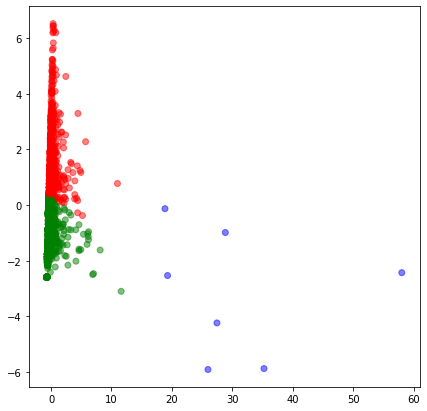

In [23]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_pca)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_pca[:,0],x_pca[:,1], c= label_color, alpha=0.5) 
plt.show()



```
# K-means avec similarité cosinus et PCA
```



In [24]:
cos_X_PCA= similarity_df.values
cos_X_std = StandardScaler().fit_transform(cos_X_PCA)

cos_pca = PCA(n_components=2)
cos_x_pca = cos_pca.fit_transform(cos_X_std)

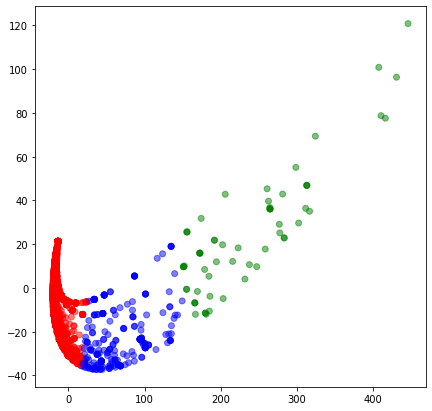

In [25]:
# Set a 3 KMeans clustering
cos_kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
cos_X_clustered = cos_kmeans.fit_predict(cos_x_pca)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in cos_X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(cos_x_pca[:,0],cos_x_pca[:,1], c= label_color, alpha=0.5) 
plt.show()


***Question 4***



```
# Spectral Clustering
```



# without PCA

EUCLIDIENNE

In [26]:
x=(Statistique1.T[3:5]).T
x=x.T
x


,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0060533226,0060533390,0060533455,0060533994,0060534044,0060534095,0060534214,0060534249,0060534389,0060534397
Nombre_Votes,206.000000,18.000000,16.000,7.0,6.000000,15.000000,12.000000,7.000000,14.000000,5.0,...,25.00,17.000000,5.0,19.000000,143.000000,5.0,55.000000,38.000000,66.000000,29.000000
"(overall, mean)",4.674757,3.555556,4.625,5.0,4.666667,4.666667,4.583333,3.714286,4.071429,4.6,...,3.92,4.411765,4.8,4.315789,4.202797,4.8,3.872727,4.052632,4.075758,4.275862


In [27]:
#Matrice de similarite euclidienne


df_euclid = pd.DataFrame(1 / (1 + distance_matrix(x.T, x.T)),
    columns=x.columns, index=x.columns
)
df_euclid

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0060533226,0060533390,0060533455,0060533994,0060534044,0060534095,0060534214,0060534249,0060534389,0060534397
000100039X,1.000000,0.005291,0.005236,0.005000,0.004975,0.005208,0.005128,0.005000,0.005181,0.004950,...,0.005494,0.005263,0.004950,0.005319,0.015625,0.004950,0.006579,0.005917,0.007092,0.005618
0001055178,0.005291,1.000000,0.306000,0.082683,0.076621,0.238143,0.141096,0.083325,0.198684,0.071215,...,0.124852,0.431691,0.071127,0.443230,0.007936,0.071127,0.026315,0.047605,0.020407,0.083170
0001473123,0.005236,0.306000,1.000000,0.099922,0.090908,0.499783,0.199991,0.099542,0.325182,0.083333,...,0.099725,0.494442,0.083324,0.249011,0.007812,0.083324,0.024995,0.043464,0.019607,0.071405
0001473727,0.005000,0.082683,0.099922,1.000000,0.486833,0.111025,0.166187,0.437500,0.124049,0.328990,...,0.052542,0.090766,0.332229,0.076808,0.007299,0.332229,0.020403,0.031236,0.016665,0.043456
0001473905,0.004975,0.076621,0.090908,0.486833,1.000000,0.100000,0.142845,0.420000,0.110839,0.499446,...,0.049963,0.083313,0.497797,0.071404,0.007246,0.497797,0.019997,0.030298,0.016393,0.041661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060534095,0.004950,0.071127,0.083324,0.332229,0.497797,0.090902,0.124948,0.305279,0.099706,0.833333,...,0.047575,0.076886,1.000000,0.066629,0.007194,1.000000,0.019605,0.029404,0.016128,0.039991
0060534214,0.006579,0.026315,0.024995,0.020403,0.019997,0.024386,0.022724,0.020408,0.023809,0.019606,...,0.032258,0.025639,0.019605,0.027025,0.011236,0.019605,1.000000,0.055553,0.083320,0.037033
0060534249,0.005917,0.047605,0.043464,0.031236,0.030298,0.041652,0.037030,0.031248,0.040000,0.029408,...,0.071425,0.045448,0.029404,0.049995,0.009434,0.029404,0.055553,1.000000,0.034483,0.099972
0060534389,0.007092,0.020407,0.019607,0.016665,0.016393,0.019230,0.018181,0.016666,0.018868,0.016128,...,0.023809,0.020000,0.016128,0.020833,0.012820,0.016128,0.083320,0.034483,1.000000,0.026315


In [28]:

w, v = LA.eig(df_euclid)
v=v.astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [29]:
#Decomposition de la matrice en P √ D(P √ D) T
from numpy.linalg import *

D=np.diag(w)
D=np.sqrt(D)


F=np.dot(v,D)
H=np.dot(D,v.T)

P=np.dot(F,H)
D,P

(array([[2.32551273e+01+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
        [0.00000000e+00+0.00000000e+00j, 1.42634319e+01+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
        [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         1.14591924e+01+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
        ...,
        [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.07282028e-33+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
        [0.00000000e+00+0.00000000e+00j, 0.00000000

In [30]:
P=P.astype(float)
P

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([[1.        , 0.00529091, 0.0052356 , ..., 0.00591712, 0.00709213,
        0.00561796],
       [0.00529091, 1.        , 0.30599988, ..., 0.04760505, 0.02040699,
        0.08317005],
       [0.0052356 , 0.30599988, 1.        , ..., 0.04346419, 0.01960668,
        0.07140466],
       ...,
       [0.00591712, 0.04760505, 0.04346419, ..., 1.        , 0.03448275,
        0.09997233],
       [0.00709213, 0.02040699, 0.01960668, ..., 0.03448275, 1.        ,
        0.02631541],
       [0.00561796, 0.08317005, 0.07140466, ..., 0.09997233, 0.02631541,
        1.        ]])

In [31]:
#Checking le produit

DF5 = pd.DataFrame(P,columns=x.columns,index=x.columns)
DF5=DF5.astype(float)
DF5

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0060533226,0060533390,0060533455,0060533994,0060534044,0060534095,0060534214,0060534249,0060534389,0060534397
000100039X,1.000000,0.005291,0.005236,0.005000,0.004975,0.005208,0.005128,0.005000,0.005181,0.004950,...,0.005494,0.005263,0.004950,0.005319,0.015625,0.004950,0.006579,0.005917,0.007092,0.005618
0001055178,0.005291,1.000000,0.306000,0.082683,0.076621,0.238143,0.141096,0.083325,0.198684,0.071215,...,0.124852,0.431691,0.071127,0.443230,0.007936,0.071127,0.026315,0.047605,0.020407,0.083170
0001473123,0.005236,0.306000,1.000000,0.099922,0.090908,0.499783,0.199991,0.099542,0.325182,0.083333,...,0.099725,0.494442,0.083324,0.249011,0.007812,0.083324,0.024995,0.043464,0.019607,0.071405
0001473727,0.005000,0.082683,0.099922,1.000000,0.486833,0.111025,0.166187,0.437500,0.124049,0.328990,...,0.052542,0.090766,0.332229,0.076808,0.007299,0.332229,0.020403,0.031236,0.016665,0.043456
0001473905,0.004975,0.076621,0.090908,0.486833,1.000000,0.100000,0.142845,0.420000,0.110839,0.499446,...,0.049963,0.083313,0.497797,0.071404,0.007246,0.497797,0.019997,0.030298,0.016393,0.041661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060534095,0.004950,0.071127,0.083324,0.332229,0.497797,0.090902,0.124948,0.305279,0.099706,0.833333,...,0.047575,0.076886,1.000000,0.066629,0.007194,1.000000,0.019605,0.029404,0.016128,0.039991
0060534214,0.006579,0.026315,0.024995,0.020403,0.019997,0.024386,0.022724,0.020408,0.023809,0.019606,...,0.032258,0.025639,0.019605,0.027025,0.011236,0.019605,1.000000,0.055553,0.083320,0.037033
0060534249,0.005917,0.047605,0.043464,0.031236,0.030298,0.041652,0.037030,0.031248,0.040000,0.029408,...,0.071425,0.045448,0.029404,0.049995,0.009434,0.029404,0.055553,1.000000,0.034483,0.099972
0060534389,0.007092,0.020407,0.019607,0.016665,0.016393,0.019230,0.018181,0.016666,0.018868,0.016128,...,0.023809,0.020000,0.016128,0.020833,0.012820,0.016128,0.083320,0.034483,1.000000,0.026315


In [32]:
# P√D


DF3=pd.DataFrame(F,columns=x.columns,index=x.columns)
DF3=DF3.astype(float)



/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [33]:
DF3
DF3=DF3.loc[:,['000100039X','0001055178']]
DF3['dim1'] = DF3['000100039X'].astype(float, errors = 'raise')
DF3['dim2'] = DF3['0001055178'].astype(float, errors = 'raise')
DF3=DF3.T.iloc[2:4]
DF3=DF3.T

Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

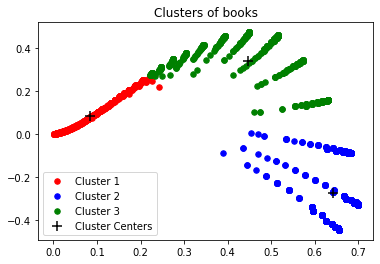

In [34]:
# Training the KMeans model with n_clusters=3
DF3=DF3.values
kmeans_sp_euc = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_sp_euc = kmeans_sp_euc.fit_predict(DF3)


plt.scatter(DF3[labels_sp_euc == 0, 0], DF3[labels_sp_euc== 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(DF3[labels_sp_euc == 1, 0], DF3[labels_sp_euc == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(DF3[labels_sp_euc == 2, 0], DF3[labels_sp_euc == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_sp_euc.cluster_centers_[:, 0], y=kmeans_sp_euc.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

COSINUS 


In [35]:

similarity_matrix_cos = cosine_similarity(x.T)
DF_cosine = pd.DataFrame(similarity_matrix_cos)
DF_cosine

,0,1,2,3,4,5,6,7,8,9,...,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640
0,1.000000,0.985188,0.966723,0.826711,0.803078,0.961351,0.942034,0.893755,0.966307,0.751102,...,0.991189,0.973386,0.736913,0.979934,0.999978,0.736913,0.998867,0.996511,0.999240,0.992359
1,0.985188,1.000000,0.996272,0.910944,0.893362,0.994324,0.985614,0.957435,0.996131,0.853185,...,0.999221,0.998266,0.841916,0.999599,0.986313,0.841916,0.992232,0.996062,0.991123,0.998818
2,0.966723,0.996272,1.000000,0.943135,0.928794,0.999795,0.996520,0.978766,0.999999,0.895001,...,0.992090,0.999622,0.885327,0.998316,0.968413,0.885327,0.977802,0.984701,0.975959,0.990901
3,0.826711,0.910944,0.943135,1.000000,0.999168,0.949665,0.967561,0.991246,0.943672,0.992383,...,0.893949,0.933646,0.989543,0.922267,0.830458,0.989543,0.852549,0.870783,0.848012,0.889813
4,0.803078,0.893362,0.928794,0.999168,1.000000,0.936100,0.956453,0.985037,0.929392,0.996581,...,0.874928,0.918261,0.994602,0.905735,0.807048,0.994602,0.830525,0.850008,0.825693,0.870463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,0.736913,0.841916,0.885327,0.989543,0.994602,0.894550,0.921003,0.961837,0.886078,0.999774,...,0.819958,0.872217,1.000000,0.856866,0.741421,1.000000,0.768249,0.790760,0.762701,0.814689
2637,0.998867,0.992232,0.977802,0.852549,0.830525,0.973364,0.956934,0.914090,0.977462,0.781669,...,0.996370,0.983190,0.768249,0.988309,0.999163,0.768249,1.000000,0.999354,0.999963,0.997106
2638,0.996511,0.996062,0.984701,0.870783,0.850008,0.980975,0.966749,0.928074,0.984418,0.803581,...,0.998786,0.989117,0.790760,0.993150,0.997047,0.790760,0.999354,1.000000,0.999007,0.999194
2639,0.999240,0.991123,0.975959,0.848012,0.825693,0.971351,0.954395,0.910559,0.975605,0.776263,...,0.995599,0.981579,0.762701,0.986958,0.999479,0.762701,0.999963,0.999007,1.000000,0.996414


In [36]:

w2, v2 = LA.eig(DF_cosine)
v2=v2.astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [37]:
from numpy import *
from numpy.linalg import *
D2=np.diag(eig(DF_cosine)[0])
D2=np.sqrt(D2)


F2=np.dot(v2,D2)
H2=np.dot(D2,v2.T)

P2=np.dot(F2,H2)
P2
v2

array([[-1.88303064e-02, -2.91522593e-02, -9.01208499e-03, ...,
        -2.00203531e-21,  1.07145046e-20,  1.01628999e-22],
       [-1.96810811e-02, -1.44317520e-02,  9.31042788e-03, ...,
         2.87700973e-10, -1.51993165e-09, -1.46687144e-11],
       [-1.98890537e-02, -6.86508604e-03,  6.49330588e-03, ...,
         2.48273760e-10, -1.30983548e-09, -1.26387764e-11],
       ...,
       [-1.93144402e-02, -2.20961374e-02, -1.29216133e-02, ...,
         1.09617989e-08, -5.78855036e-08, -5.58614015e-10],
       [-1.90727729e-02, -2.58823430e-02, -1.68263048e-02, ...,
         2.48623460e-10, -1.45181370e-09, -1.41895260e-11],
       [-1.94992714e-02, -1.86483726e-02,  1.59894055e-02, ...,
         6.07188479e-09, -3.19790989e-08, -3.08499911e-10]])

In [38]:
DF8 = pd.DataFrame(P2,columns=x.columns,index=x.columns)
DF8=DF8.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [39]:
P2=P2.astype(float)
P2
P=P.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [40]:
DF7 = pd.DataFrame(F2,columns=x.columns,index=x.columns)
#DF72 = pd.DataFrame(F2,columns=['000100039X','0001055178'],index=x.columns)
#print(DF7.loc[:,['000100039X','0001055178']])
DF72=DF7.loc[:,['000100039X','0001055178']]
DF72['dim1'] = DF72['000100039X'].astype(float, errors = 'raise')
DF72['dim2'] = DF72['0001055178'].astype(float, errors = 'raise')
DF72=DF72.T.iloc[2:4]
DF72=DF72.T
DF72=DF72.astype(float, errors = 'raise')



Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

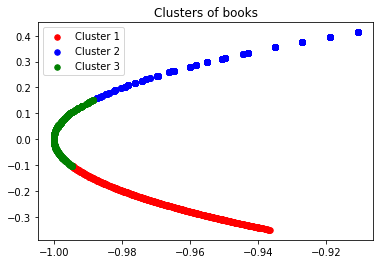

In [41]:
# Training the KMeans model with n_clusters=3
DF72=DF72.values
kmeans_sp_cos = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_sp_cos = kmeans_sp_euc.fit_predict(DF72)


plt.scatter(DF72[labels_sp_cos == 0, 0], DF72[labels_sp_cos== 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(DF72[labels_sp_cos == 1, 0], DF72[labels_sp_cos == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(DF72[labels_sp_cos == 2, 0], DF72[labels_sp_cos == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
#plt.scatter(x=kmeans_sp_cos.cluster_centers_[:, 0], y=kmeans_sp_cos.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

# With PCA


EUCLIDIENNE


In [42]:
from sklearn.preprocessing import StandardScaler
X_PCA_sim= Statistique1.values
X_std_sim = StandardScaler().fit_transform(X_PCA_sim)

pca = PCA(n_components=2)
x_pca_sim = pca.fit_transform(X_std_sim)

In [43]:
x1=x_pca_sim
x1
x1 = pd.DataFrame(x1)
x1=x1.T
x1

,0,1,2,3,4,5,6,7,8,9,...,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640
0,1.276106,-0.066505,-0.363092,-0.700666,-0.474228,-0.371210,-0.402135,-0.116413,-0.167792,-0.456704,...,-0.023759,-0.262426,-0.597446,-0.283080,1.112831,-0.597446,0.356818,0.111934,0.352687,-0.189148
1,-1.325974,1.254940,-0.800984,-2.589960,-1.112315,-0.820932,-1.052074,1.894349,0.545545,-0.927958,...,1.121545,-0.574346,-1.757332,-0.617343,0.265154,-1.757332,1.232068,0.829185,0.445654,-0.074685


In [44]:
#Matrice de similarite euclidienne


df_euclid_pca = pd.DataFrame(1 / (1 + distance_matrix(x1.T, x1.T)),
    columns=Stat.index, index=Stat.index
)
df_euclid_pca

,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0060533226,0060533390,0060533455,0060533994,0060534044,0060534095,0060534214,0060534249,0060534389,0060534397
000100039X,1.000000,0.255804,0.367483,0.298834,0.361883,0.367242,0.370309,0.221803,0.297285,0.359980,...,0.265162,0.368689,0.342165,0.368641,0.384692,0.342165,0.268947,0.289898,0.333573,0.341666
0001055178,0.255804,1.000000,0.324970,0.204213,0.293935,0.322777,0.300183,0.609253,0.582550,0.310800,...,0.877134,0.352144,0.246384,0.346648,0.393756,0.246384,0.702276,0.684165,0.523174,0.428216
0001473123,0.367483,0.324970,1.000000,0.354541,0.751556,0.978917,0.797380,0.269789,0.423618,0.863742,...,0.338725,0.801289,0.503869,0.833115,0.354520,0.503869,0.316782,0.370649,0.410254,0.572463
0001473727,0.298834,0.204213,0.354541,1.000000,0.400818,0.357214,0.389621,0.181087,0.239208,0.373161,...,0.209524,0.326509,0.543773,0.331528,0.228187,0.543773,0.201385,0.221514,0.237351,0.280366
0001473905,0.361883,0.293935,0.751556,0.400818,1.000000,0.763908,0.914119,0.248270,0.372309,0.843749,...,0.304987,0.633649,0.603617,0.653339,0.322428,0.603617,0.286753,0.330245,0.361818,0.481677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060534095,0.342165,0.246384,0.503869,0.543773,0.603617,0.509336,0.577433,0.213528,0.299167,0.543115,...,0.254099,0.448529,1.000000,0.458182,0.274072,1.000000,0.241662,0.271589,0.294192,0.366103
0060534214,0.268947,0.702276,0.316782,0.201385,0.286753,0.314637,0.293519,0.551274,0.536475,0.302284,...,0.716178,0.343689,0.241662,0.338182,0.448957,0.241662,1.000000,0.679593,0.559777,0.413869
0060534249,0.289898,0.684165,0.370649,0.221514,0.330245,0.367729,0.338957,0.478614,0.715119,0.351264,...,0.756249,0.407731,0.271589,0.400081,0.465359,0.271589,0.679593,1.000000,0.688310,0.512112
0060534389,0.333573,0.523174,0.410254,0.237351,0.361818,0.406693,0.373527,0.396392,0.653604,0.385454,...,0.563808,0.456388,0.294192,0.446705,0.561394,0.294192,0.559777,0.688310,1.000000,0.571029


In [45]:
from numpy import linalg as LA
w_pca, v_pca = LA.eig(df_euclid_pca)
#v=v.astype(float)
v_pca

array([[ 1.41103017e-02+0.j,  4.71397208e-03+0.j,  4.26621555e-03+0.j,
        ..., -4.68293219e-19+0.j, -5.23520648e-20+0.j,
         1.45249107e-32+0.j],
       [ 1.84966994e-02+0.j, -2.79109710e-02+0.j,  1.83110220e-02+0.j,
        ...,  2.92739261e-18+0.j, -6.29120955e-19+0.j,
        -4.61144603e-19+0.j],
       [ 2.28642284e-02+0.j,  1.60817604e-02+0.j, -1.45893168e-02+0.j,
        ..., -2.19123388e-17+0.j,  1.35516863e-18+0.j,
         4.85921754e-19+0.j],
       ...,
       [ 1.97079607e-02+0.j, -2.41449791e-02+0.j,  3.82698600e-03+0.j,
        ...,  2.41426975e-18+0.j, -3.36636780e-18+0.j,
         2.00099125e-19+0.j],
       [ 1.94876986e-02+0.j, -1.60815527e-02+0.j, -4.95708320e-03+0.j,
        ...,  2.62283658e-18+0.j, -1.33469885e-18+0.j,
        -1.49467180e-19+0.j],
       [ 2.26704292e-02+0.j, -6.09495202e-03+0.j, -2.75824526e-02+0.j,
        ..., -1.06387186e-17+0.j,  1.68971705e-18+0.j,
         6.62358002e-20+0.j]])

In [46]:
D_pca=np.diag(w_pca)
D_pca

array([[ 1.16535643e+03+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  3.28160132e+02+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.76353946e+02+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       ...,
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  5.67568015e-36+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j, -5.82275187e-37+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         1.67655839e-50+0.j]])

In [47]:
D_pca=np.sqrt(D_pca)
D_pca

array([[3.41373172e+01+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, ...,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 1.81151906e+01+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, ...,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        1.32798323e+01+0.00000000e+00j, ...,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       ...,
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, ...,
        2.38236860e-18+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+0

In [48]:
f=np.dot(v_pca,D_pca)
f

array([[ 4.81687846e-01+0.00000000e+00j,  8.53945028e-02+0.00000000e+00j,
         5.66546271e-02+0.00000000e+00j, ...,
        -1.11564706e-36+0.00000000e+00j,  0.00000000e+00-3.99482682e-38j,
         1.88071424e-57+0.00000000e+00j],
       [ 6.31427696e-01+0.00000000e+00j, -5.05612562e-01+0.00000000e+00j,
         2.43167302e-01+0.00000000e+00j, ...,
         6.97412823e-36+0.00000000e+00j,  0.00000000e+00-4.80063064e-37j,
        -5.97099176e-44+0.00000000e+00j],
       [ 7.80523416e-01+0.00000000e+00j,  2.91324155e-01+0.00000000e+00j,
        -1.93743681e-01+0.00000000e+00j, ...,
        -5.22032679e-35+0.00000000e+00j,  0.00000000e+00+1.03408796e-36j,
         6.29181123e-44+0.00000000e+00j],
       ...,
       [ 6.72776905e-01+0.00000000e+00j, -4.37390900e-01+0.00000000e+00j,
         5.08217324e-02+0.00000000e+00j, ...,
         5.75168045e-36+0.00000000e+00j,  0.00000000e+00-2.56877287e-36j,
         2.59092315e-44+0.00000000e+00j],
       [ 6.65257747e-01+0.00000000e+00j, -2.

In [49]:
f=np.dot(v_pca,D_pca)
f1=np.dot(D_pca,v_pca.T)
f2=np.dot(f,f1)
f2

array([[1.        -9.18606046e-62j, 0.25580372+2.26798075e-60j,
        0.36748282-7.56541111e-61j, ..., 0.28989788-7.55124046e-61j,
        0.3335735 -1.34746261e-61j, 0.34166608+6.24611562e-60j],
       [0.25580372-2.64962661e-60j, 1.        -2.18604349e-59j,
        0.32497007+4.95176462e-58j, ..., 0.68416468+3.25689285e-59j,
        0.52317418+1.91505127e-59j, 0.42821606-8.83005379e-59j],
       [0.36748282-3.47626652e-61j, 0.32497007+2.34958328e-59j,
        1.        -3.64110394e-59j, ..., 0.3706492 +1.43021577e-59j,
        0.41025417+5.89483041e-59j, 0.57246317+4.29972796e-58j],
       ...,
       [0.28989788-2.38668128e-62j, 0.68416468-2.22403443e-59j,
        0.3706492 -2.07288339e-59j, ..., 1.        +2.21935751e-60j,
        0.68831006+9.24558921e-60j, 0.51211229-6.18017163e-59j],
       [0.3335735 -1.82191162e-61j, 0.52317418-1.96404044e-59j,
        0.41025417-3.22795843e-59j, ..., 0.68831006+1.72016141e-60j,
        1.        +3.07917716e-60j, 0.5710291 -1.76329263e-59j]

In [50]:
f2=f2.astype(float)
f2=pd.DataFrame(f2,columns=df_euclid_pca.columns,index=df_euclid_pca.index)
f2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0060533226,0060533390,0060533455,0060533994,0060534044,0060534095,0060534214,0060534249,0060534389,0060534397
000100039X,1.000000,0.255804,0.367483,0.298834,0.361883,0.367242,0.370309,0.221803,0.297285,0.359980,...,0.265162,0.368689,0.342165,0.368641,0.384692,0.342165,0.268947,0.289898,0.333573,0.341666
0001055178,0.255804,1.000000,0.324970,0.204213,0.293935,0.322777,0.300183,0.609253,0.582550,0.310800,...,0.877134,0.352144,0.246384,0.346648,0.393756,0.246384,0.702276,0.684165,0.523174,0.428216
0001473123,0.367483,0.324970,1.000000,0.354541,0.751556,0.978917,0.797380,0.269789,0.423618,0.863742,...,0.338725,0.801289,0.503869,0.833115,0.354520,0.503869,0.316782,0.370649,0.410254,0.572463
0001473727,0.298834,0.204213,0.354541,1.000000,0.400818,0.357214,0.389621,0.181087,0.239208,0.373161,...,0.209524,0.326509,0.543773,0.331528,0.228187,0.543773,0.201385,0.221514,0.237351,0.280366
0001473905,0.361883,0.293935,0.751556,0.400818,1.000000,0.763908,0.914119,0.248270,0.372309,0.843749,...,0.304987,0.633649,0.603617,0.653339,0.322428,0.603617,0.286753,0.330245,0.361818,0.481677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060534095,0.342165,0.246384,0.503869,0.543773,0.603617,0.509336,0.577433,0.213528,0.299167,0.543115,...,0.254099,0.448529,1.000000,0.458182,0.274072,1.000000,0.241662,0.271589,0.294192,0.366103
0060534214,0.268947,0.702276,0.316782,0.201385,0.286753,0.314637,0.293519,0.551274,0.536475,0.302284,...,0.716178,0.343689,0.241662,0.338182,0.448957,0.241662,1.000000,0.679593,0.559777,0.413869
0060534249,0.289898,0.684165,0.370649,0.221514,0.330245,0.367729,0.338957,0.478614,0.715119,0.351264,...,0.756249,0.407731,0.271589,0.400081,0.465359,0.271589,0.679593,1.000000,0.688310,0.512112
0060534389,0.333573,0.523174,0.410254,0.237351,0.361818,0.406693,0.373527,0.396392,0.653604,0.385454,...,0.563808,0.456388,0.294192,0.446705,0.561394,0.294192,0.559777,0.688310,1.000000,0.571029


In [51]:
# P√D
DF3_pca=pd.DataFrame(f,columns=x1.columns,index=Stat.index)
DF3_pca=DF3_pca.astype(float)
DF3_pca


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,0,1,2,3,4,5,6,7,8,9,...,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640
000100039X,0.481688,0.085395,0.056655,-0.014292,-0.051153,-0.063942,0.243043,-0.331736,0.035756,-0.005761,...,1.953367e-35,3.869600e-36,3.869600e-36,-2.595133e-36,0.0,1.020557e-36,1.020557e-36,-1.115647e-36,0.0,1.880714e-57
0001055178,0.631428,-0.505613,0.243167,0.032800,0.240588,-0.194302,-0.106627,-0.007944,-0.061070,-0.140179,...,3.332215e-35,-8.174249e-35,-8.174249e-35,1.351989e-35,0.0,3.139211e-35,3.139211e-35,6.974128e-36,0.0,-5.970992e-44
0001473123,0.780523,0.291324,-0.193744,-0.272836,0.142561,-0.093525,0.081130,0.136016,-0.039339,0.147758,...,7.879413e-34,1.315740e-34,1.315740e-34,3.175080e-35,0.0,-2.497886e-35,-2.497886e-35,-5.220327e-35,0.0,6.291811e-44
0001473727,0.489841,0.305152,0.299131,0.273524,-0.342892,-0.421347,0.268688,0.239461,0.196223,-0.139582,...,2.409896e-23,2.370356e-24,2.370356e-24,-9.512428e-26,0.0,2.479103e-26,2.479103e-26,-1.535876e-24,0.0,-2.448975e-43
0001473905,0.750874,0.410422,0.018776,-0.151626,0.226520,0.105219,0.056426,0.119613,0.113375,-0.051582,...,1.893842e-22,5.669697e-23,5.669697e-23,-4.993401e-23,0.0,1.973932e-23,1.973932e-23,-9.524271e-24,0.0,-2.145553e-43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060534095,0.652689,0.474526,0.340470,0.246551,-0.100370,0.047629,-0.176422,-0.060764,-0.158606,0.138254,...,-1.109817e-18,-2.272421e-19,-2.272421e-19,1.653159e-19,0.0,-1.208065e-19,-1.208065e-19,8.826284e-19,0.0,-6.117668e-40
0060534214,0.594010,-0.429899,0.212267,-0.014949,0.123595,-0.118767,0.011084,-0.161046,-0.003686,-0.039701,...,-1.553068e-35,1.991830e-35,1.991830e-35,4.671832e-35,0.0,-5.046449e-36,-5.046449e-36,6.176004e-36,0.0,2.118240e-44
0060534249,0.672777,-0.437391,0.050822,0.178454,0.168046,-0.030519,0.121345,-0.067380,-0.108285,-0.005478,...,1.225622e-35,-7.238684e-36,-7.238684e-36,-1.832072e-35,0.0,1.288867e-35,1.288867e-35,5.751680e-36,0.0,2.590923e-44
0060534389,0.665258,-0.291320,-0.065829,0.125687,0.017578,0.018763,0.173987,-0.226338,-0.008237,0.032749,...,1.648280e-34,4.171409e-36,4.171409e-36,-3.573719e-35,0.0,1.627606e-35,1.627606e-35,6.248564e-36,0.0,-1.935331e-44


In [52]:
DFF_pca=DF3_pca.T.iloc[0:2]
DF9_pca=DFF_pca.T
DF9_pca['dim1'] = DF9_pca[0].astype(float, errors = 'raise')
DF9_pca['dim2'] = DF9_pca[1].astype(float, errors = 'raise')
PD_euc_pca=DF9_pca.loc[:,['dim1','dim2']]
PD_euc_pca

,dim1,dim2
000100039X,0.481688,0.085395
0001055178,0.631428,-0.505613
0001473123,0.780523,0.291324
0001473727,0.489841,0.305152
0001473905,0.750874,0.410422
...,...,...
0060534095,0.652689,0.474526
0060534214,0.594010,-0.429899
0060534249,0.672777,-0.437391
0060534389,0.665258,-0.291320


Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

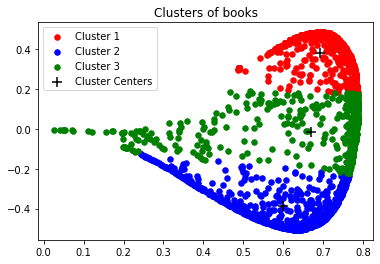

In [53]:
# Training the KMeans model with n_clusters=3
PD_euc_pca=PD_euc_pca.values
kmeans_sp_eucl = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_sp_eucl = kmeans_sp_eucl.fit_predict(PD_euc_pca)


plt.scatter(PD_euc_pca[labels_sp_eucl == 0, 0], PD_euc_pca[labels_sp_eucl== 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(PD_euc_pca[labels_sp_eucl == 1, 0], PD_euc_pca[labels_sp_eucl == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(PD_euc_pca[labels_sp_eucl == 2, 0], PD_euc_pca[labels_sp_eucl == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_sp_eucl.cluster_centers_[:, 0], y=kmeans_sp_eucl.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

COSINUS

In [54]:
#Cosine similarity matrix
import scipy as sp
M_cosine_pca = np.zeros((x1.shape[1],x1.shape[1]))

#Iterate through DataFrame columns to measure euclidean distance
for i in range(x1.shape[1]):
    u1= x1[x1.columns[i]]
    for j in range(x1.shape[1]):
        v1= x1[x1.columns[j]]
        #Euclidean distance -> Euclidean similarity
        M_cosine_pca[i,j] = (1/(1+sp.spatial.distance.cosine(u1,v1)))
DF_cosine_pca = pd.DataFrame(M_cosine_pca,columns=Stat.index,index=Stat.index)
DF_cosine_pca



,000100039X,0001055178,0001473123,0001473727,0001473905,0001712772,000171287X,0001714538,0002005395,0002006715,...,0060533226,0060533390,0060533455,0060533994,0060534044,0060534095,0060534214,0060534249,0060534389,0060534397
000100039X,1.000000,0.362817,0.613480,0.673146,0.621445,0.613806,0.635104,0.362096,0.345717,0.602508,...,0.365624,0.612436,0.648920,0.611966,0.670035,0.648920,0.400130,0.381493,0.468454,0.420106
0001055178,0.362817,1.000000,0.346301,0.338968,0.345084,0.346249,0.343184,0.999964,0.970902,0.348117,...,0.999496,0.346466,0.341481,0.346541,0.549444,0.341481,0.947384,0.982842,0.800135,0.431495
0001473123,0.613480,0.346301,1.000000,0.987171,0.999745,1.000000,0.998173,0.346770,0.363746,0.999496,...,0.344609,0.999996,0.995236,0.999991,0.382742,0.995236,0.334483,0.338085,0.336654,0.780343
0001473727,0.673146,0.338968,0.987171,1.000000,0.990474,0.987317,0.994941,0.339275,0.351386,0.981744,...,0.337889,0.986699,0.997988,0.986483,0.403589,0.997988,0.333351,0.334274,0.342583,0.712967
0001473905,0.621445,0.345084,0.999745,0.990474,1.000000,0.999766,0.999282,0.345531,0.361802,0.998526,...,0.343481,0.999673,0.997175,0.999638,0.385398,0.997175,0.334149,0.337372,0.337301,0.770782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060534095,0.648920,0.341481,0.995236,0.997988,0.997175,0.995326,0.999302,0.341851,0.355832,0.991678,...,0.340165,0.994942,1.000000,0.994807,0.394857,1.000000,0.333450,0.335421,0.339885,0.739153
0060534214,0.400130,0.947384,0.334483,0.333351,0.334149,0.334468,0.333718,0.944874,0.859334,0.335048,...,0.956409,0.334531,0.333450,0.334553,0.663674,0.333450,1.000000,0.989227,0.930950,0.382921
0060534249,0.381493,0.982842,0.338085,0.334274,0.337372,0.338054,0.336309,0.981296,0.915661,0.339186,...,0.988099,0.338183,0.335421,0.338228,0.609694,0.335421,0.989227,1.000000,0.877286,0.401867
0060534389,0.468454,0.800135,0.336654,0.342583,0.337301,0.336679,0.338520,0.796565,0.697869,0.335842,...,0.813558,0.336573,0.339885,0.336536,0.823332,0.339885,0.930950,0.877286,1.000000,0.349017


In [55]:
w2_pca, v2_pca = LA.eig(DF_cosine_pca)
v2_pca=v2_pca.astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [56]:
from numpy import *
from numpy.linalg import *
D2_pca=diag(w2_pca)
D2_pca=np.sqrt(D2_pca)


F2_pca=np.dot(v2_pca,D2_pca)
H2_pca=np.dot(D2_pca,v2_pca.T)

P2_pca=np.dot(F2_pca,H2_pca)
P2_pca
v2_pca

array([[ 1.63554390e-02,  7.04996856e-03, -3.97679003e-02, ...,
         7.56345891e-16, -1.53868875e-14, -9.07329847e-28],
       [ 1.82624857e-02, -2.52199784e-02, -3.48930775e-03, ...,
        -4.38073809e-11,  8.91202464e-10, -2.27121218e-19],
       [ 2.14697183e-02,  1.81643719e-02,  2.19420986e-03, ...,
         1.69089558e-09, -3.43983406e-08,  2.39390281e-19],
       ...,
       [ 1.78909652e-02, -2.47771529e-02, -1.28692518e-02, ...,
        -1.91053233e-09,  3.88466466e-08,  1.24417673e-19],
       [ 1.61107853e-02, -1.87586118e-02, -3.26293939e-02, ...,
        -6.53663327e-08,  1.32977262e-06, -5.96128176e-20],
       [ 1.94690396e-02,  7.28700404e-03,  3.61502156e-02, ...,
         1.08332106e-07, -2.20380397e-06, -4.04565989e-19]])

In [57]:
DF7_pca = pd.DataFrame(F2_pca,columns=x1.columns,index=Stat.index)
DF7_pca
#DF72 = pd.DataFrame(F2,columns=['000100039X','0001055178'],index=x.columns)
#print(DF7.loc[:,['000100039X','0001055178']])
DF72_pca=DF7_pca.T.iloc[0:2]
DF72_pca=DF72_pca.T
DF72_pca
#DF72[0].astype(float, errors = 'raise')
DF72_pca['dim1'] = DF72_pca[0].astype(float, errors = 'raise')
DF72_pca['dim2'] = DF72_pca[1].astype(float, errors = 'raise')
PD_cos_pca=DF72_pca.loc[:,['dim1','dim2']]
PD_cos_pca


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,dim1,dim2
000100039X,0.666380,0.183520
0001055178,0.744081,-0.656509
0001473123,0.874755,0.472842
0001473727,0.867348,0.480733
0001473905,0.874437,0.475284
...,...,...
0060534095,0.871688,0.480277
0060534214,0.711762,-0.616773
0060534249,0.728943,-0.644982
0060534389,0.656412,-0.488311


Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

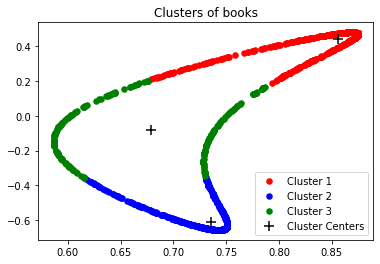

In [58]:
PD_cos_pca=PD_cos_pca.values
kmeans_sp_cosi = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_sp_cosi = kmeans_sp_cosi.fit_predict(PD_cos_pca)
labels_sp_cosi

plt.scatter(PD_cos_pca[labels_sp_cosi == 0, 0], PD_cos_pca[labels_sp_cosi== 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(PD_cos_pca[labels_sp_cosi == 1, 0], PD_cos_pca[labels_sp_cosi == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(PD_cos_pca[labels_sp_cosi == 2, 0], PD_cos_pca[labels_sp_cosi == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_sp_cosi.cluster_centers_[:, 0], y=kmeans_sp_cosi.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

***Q-5)Utilisez les m´etriques suivantes pour ´evaluer la qualit´e de votre segmentation (dans le cas des k-moyennes et le cas spectral) lorsque vous utilisez
dans un premier temps une distance euclidienne et ensuite dans un deuxi`eme
temps la similarit´e cosinus: la silhouette et l’information mutuelle.***

# Avant PCA

In [59]:
labels1=cos_kmeans.labels_

In [60]:
#silouhette

#KMEANS,euc

X_Silouhaitte_km= Statistique1
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X_Silouhaitte_km)
silouette_km_euc = silhouette_score(X_Silouhaitte_km, km.labels_, metric='euclidean')

print('Score Silhouette pour KMeans avec distance euclidienne : %.3f' % silouette_km_euc)
#KMEANS,cos


silouette_km_cos= silhouette_score(X_cos,labels1, metric='cosine')

print('Score Silhouette pour KMeans avec similarité cosinus : %.3f' % silouette_km_cos)

#SPECTRAL,euc

X_Silouhaitte_Sp = PD_euc_pca
silouette_sp_euc = silhouette_score(X_Silouhaitte_Sp, labels_sp_eucl, metric='euclidean')

print('Score Silhouette pour Spectral pour distance euclidienne: %.3f' % silouette_sp_euc)

#SPECTRAL,cos
X_Silouhaitte_Sp_cos = PD_cos_pca
silouette_sp_cos= silhouette_score(X_Silouhaitte_Sp_cos, labels_sp_cosi, metric='cosine')

print('Score Silhouette pour spectral evce similarité cosinus : %.3f' % silouette_sp_cos)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Score Silhouette pour KMeans avec distance euclidienne : 0.932
Score Silhouette pour KMeans avec similarité cosinus : 0.467
Score Silhouette pour Spectral pour distance euclidienne: 0.524
Score Silhouette pour spectral evce similarité cosinus : 0.901


In [61]:
#info mutuelle StandardScaler
import sklearn
#kmeans,euc
labels_true=Statistique2['Classe']
InfoMut_km_euc=sklearn.metrics.normalized_mutual_info_score(labels_true, y_kmeans,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne : %.3f' % InfoMut_km_euc)
#kmeans,cos
InfoMut_km_cos=sklearn.metrics.normalized_mutual_info_score(labels_true, kmeans_cos.labels_,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus : %.3f' % InfoMut_km_cos)



#SP,euc
labels_true=Statistique2['Classe']
InfoMut_sp_euc=sklearn.metrics.normalized_mutual_info_score(labels_true, labels_sp_eucl ,average_method='arithmetic')
print('Score Info Mutuelle pour Spectral avec distance euclidienne : %.3f' % InfoMut_sp_euc)
#SP,cos
InfoMut_sp_cos=sklearn.metrics.normalized_mutual_info_score(labels_true, labels_sp_cosi,average_method='arithmetic')
print('Score Info Mutuelle pour Spectral avec similarité cosinus : %.3f' % InfoMut_sp_cos)

Score Info Mutuelle pour KMeans avec distance euclidienne : 0.250
Score Info Mutuelle pour KMeans avec similarité cosinus : 0.525
Score Info Mutuelle pour Spectral avec distance euclidienne : 0.133
Score Info Mutuelle pour Spectral avec similarité cosinus : 0.160


In [62]:
#Qualité.=pd.DataFrame(columns=['Silouette','Info.Mut'])
Qualité=pd.DataFrame(index = ['Kmeans','Spectral'],columns=['Distance euclidienne_Siloutte','Distance euclidienne_IonfoMut','Similarité cosinus_Silouette','Similarité cosinus_InfoMut'])
Qualité['Distance euclidienne_Siloutte']=[silouette_km_euc,silouette_sp_euc]
Qualité['Similarité cosinus_Silouette']=[silouette_km_cos,silouette_sp_cos]
Qualité['Distance euclidienne_IonfoMut']=[InfoMut_km_euc,InfoMut_sp_euc]
Qualité['Similarité cosinus_InfoMut']=[InfoMut_km_cos,InfoMut_sp_cos]

Qualité

,Distance euclidienne_Siloutte,Distance euclidienne_IonfoMut,Similarité cosinus_Silouette,Similarité cosinus_InfoMut
Kmeans,0.931563,0.249842,0.467456,0.525214
Spectral,0.524094,0.132681,0.901090,0.160042


# Après PCA

In [63]:
#silouhette

#KMEANS,euc

X_Silouhaitte_km= Statistique1
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X_Silouhaitte_km)
silouette_km_euc = silhouette_score(X_Silouhaitte_km, km.labels_, metric='euclidean')

print('Score Silhouette pour KMeans avec distance euclidienne : %.3f' % silouette_km_euc)
#KMEANS,cos


silouette_km_cos= silhouette_score(X_cos,kmeans_cos.labels_, metric='cosine')

print('Score Silhouette pour KMeans avec similarité cosinus : %.3f' % silouette_km_cos)

#SPECTRAL,euc

X_Silouhaitte_Sp = P
silouette_sp_euc = silhouette_score(X_Silouhaitte_Sp, labels_sp_euc, metric='euclidean')

print('Score Silhouette pour Spectral pour distance euclidienne: %.3f' % silouette_sp_euc)

#SPECTRAL,cos
X_Silouhaitte_Sp_cos = P2
silouette_sp_cos= silhouette_score(X_Silouhaitte_Sp_cos, labels_sp_cos, metric='cosine')

print('Score Silhouette pour spectral evce similarité cosinus : %.3f' % silouette_sp_cos)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Score Silhouette pour KMeans avec distance euclidienne : 0.932
Score Silhouette pour KMeans avec similarité cosinus : 0.463
Score Silhouette pour Spectral pour distance euclidienne: 0.408
Score Silhouette pour spectral evce similarité cosinus : 0.761


In [64]:
#info mutuelle StandardScaler
import sklearn
#kmeans,euc
labels_true=Statistique2['Classe']
InfoMut_km_euc=sklearn.metrics.normalized_mutual_info_score(labels_true, y_kmeans,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne : %.3f' % InfoMut_km_euc)
#kmeans,cos
InfoMut_km_cos=sklearn.metrics.normalized_mutual_info_score(labels_true, kmeans_cos.labels_,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus : %.3f' % InfoMut_km_cos)



#SP,euc
labels_true=Statistique2['Classe']
InfoMut_sp_euc=sklearn.metrics.normalized_mutual_info_score(labels_true, labels_sp_euc ,average_method='arithmetic')
print('Score Info Mutuelle pour Spectral avec distance euclidienne : %.3f' % InfoMut_sp_euc)
#SP,cos
InfoMut_sp_cos=sklearn.metrics.normalized_mutual_info_score(labels_true, labels_sp_cos,average_method='arithmetic')
print('Score Info Mutuelle pour Spectral avec similarité cosinus : %.3f' % InfoMut_sp_cos)


Score Info Mutuelle pour KMeans avec distance euclidienne : 0.250
Score Info Mutuelle pour KMeans avec similarité cosinus : 0.525
Score Info Mutuelle pour Spectral avec distance euclidienne : 0.002
Score Info Mutuelle pour Spectral avec similarité cosinus : 0.012


In [65]:
#Qualité.=pd.DataFrame(columns=['Silouette','Info.Mut'])
Qualité=pd.DataFrame(index = ['Kmeans','Spectral'],columns=['Distance euclidienne_Siloutte','Distance euclidienne_IonfoMut','Similarité cosinus_Silouette','Similarité cosinus_InfoMut'])
Qualité['Distance euclidienne_Siloutte']=[silouette_km_euc,silouette_sp_euc]
Qualité['Similarité cosinus_Silouette']=[silouette_km_cos,silouette_sp_cos]
Qualité['Distance euclidienne_IonfoMut']=[InfoMut_km_euc,InfoMut_sp_euc]
Qualité['Similarité cosinus_InfoMut']=[InfoMut_km_cos,InfoMut_sp_cos]

Qualité

,Distance euclidienne_Siloutte,Distance euclidienne_IonfoMut,Similarité cosinus_Silouette,Similarité cosinus_InfoMut
Kmeans,0.931563,0.249842,0.463397,0.525214
Spectral,0.408289,0.001748,0.760678,0.012212


# Partie B

 **Question1**
 Réponse: voir rapport

**Question2:**

In [144]:
Stat

,Apprécié,Neutre,Moins_Apprécié
000100039X,188.0,8.0,10.0
0001055178,12.0,2.0,4.0
0001473123,15.0,0.0,1.0
0001473727,7.0,0.0,0.0
0001473905,5.0,1.0,0.0
...,...,...,...
0060975504,26.0,5.0,2.0
0060975547,13.0,2.0,1.0
0060975598,15.0,3.0,0.0
0060975768,208.0,6.0,6.0


In [145]:
Stat_new = Stat
Stat_new

,Apprécié,Neutre,Moins_Apprécié
000100039X,188.0,8.0,10.0
0001055178,12.0,2.0,4.0
0001473123,15.0,0.0,1.0
0001473727,7.0,0.0,0.0
0001473905,5.0,1.0,0.0
...,...,...,...
0060975504,26.0,5.0,2.0
0060975547,13.0,2.0,1.0
0060975598,15.0,3.0,0.0
0060975768,208.0,6.0,6.0


In [146]:
maxValues = Stat_new.max(axis = 1)
print(maxValues)

000100039X    188.0
0001055178     12.0
0001473123     15.0
0001473727      7.0
0001473905      5.0
              ...  
0060975504     26.0
0060975547     13.0
0060975598     15.0
0060975768    208.0
0060975776     62.0
Length: 5894, dtype: float64


In [147]:
maxValueIndex = pd.DataFrame(Stat_new.idxmax(axis=1),columns=['Catégorie'])
maxValueIndex

,Catégorie
000100039X,Apprécié
0001055178,Apprécié
0001473123,Apprécié
0001473727,Apprécié
0001473905,Apprécié
...,...
0060975504,Apprécié
0060975547,Apprécié
0060975598,Apprécié
0060975768,Apprécié


In [148]:

(maxValueIndex.value_counts()) / len(maxValueIndex) * 100

Catégorie     
Apprécié          96.827282
Moins_Apprécié     2.239566
Neutre             0.933152
dtype: float64

In [149]:
new_X = pd.concat([Statistique1.T.iloc[0:7],maxValueIndex.T]).T
new_X

,Apprécié,Neutre,Moins_Apprécié,Nombre_Votes,"(overall, mean)","(overall, std)","(overall, median)",Catégorie
000100039X,188.0,8.0,10.0,206.0,4.674757,0.875712,5.0,Apprécié
0001055178,12.0,2.0,4.0,18.0,3.555556,0.983524,4.0,Apprécié
0001473123,15.0,0.0,1.0,16.0,4.625,1.024695,5.0,Apprécié
0001473727,7.0,0.0,0.0,7.0,5.0,0.0,5.0,Apprécié
0001473905,5.0,1.0,0.0,6.0,4.666667,0.816497,5.0,Apprécié
...,...,...,...,...,...,...,...,...
0060975504,26.0,5.0,2.0,33.0,4.151515,1.093195,4.0,Apprécié
0060975547,13.0,2.0,1.0,16.0,4.25,0.930949,4.5,Apprécié
0060975598,15.0,3.0,0.0,18.0,4.388889,0.777544,5.0,Apprécié
0060975768,208.0,6.0,6.0,220.0,4.668182,0.742627,5.0,Apprécié


In [150]:
df_stratified=new_X.groupby('Catégorie', group_keys=False).apply(lambda x: x.sample(55))
df_stratified=df_stratified.T.iloc[0:7]
df_stratified=df_stratified.T
df_stratified

,Apprécié,Neutre,Moins_Apprécié,Nombre_Votes,"(overall, mean)","(overall, std)","(overall, median)"
0060751002,19.0,3.0,5.0,27.0,3.925926,1.327981,4.0
0028617606,8.0,1.0,0.0,9.0,4.555556,0.726483,5.0
0060653388,7.0,1.0,0.0,8.0,4.5,0.755929,5.0
0060515147,7.0,2.0,0.0,9.0,4.444444,0.881917,5.0
0060270926,5.0,1.0,0.0,6.0,4.666667,0.816497,5.0
...,...,...,...,...,...,...,...
0060107278,2.0,4.0,0.0,6.0,3.666667,1.032796,3.0
0060571616,2.0,3.0,0.0,5.0,3.6,0.894427,3.0
006053110X,3.0,4.0,0.0,7.0,3.714286,0.95119,3.0
0060535172,1.0,4.0,2.0,7.0,2.857143,1.214986,3.0


In [151]:
df_stratified_info_mutu=new_X.groupby('Catégorie', group_keys=False).apply(lambda x: x.sample(55))
df_stratified_info_mutu


,Apprécié,Neutre,Moins_Apprécié,Nombre_Votes,"(overall, mean)","(overall, std)","(overall, median)",Catégorie
006083417X,3.0,0.0,2.0,5.0,2.8,1.643168,4.0,Apprécié
0060924829,31.0,11.0,8.0,50.0,3.66,1.042172,4.0,Apprécié
006073132X,612.0,142.0,100.0,854.0,3.962529,1.130832,4.0,Apprécié
0060798718,28.0,2.0,4.0,34.0,4.088235,1.055079,4.0,Apprécié
0060586370,46.0,9.0,7.0,62.0,4.129032,1.180218,5.0,Apprécié
...,...,...,...,...,...,...,...,...
0007204477,1.0,2.0,2.0,5.0,2.8,1.48324,3.0,Neutre
0060580909,1.0,2.0,2.0,5.0,2.4,1.341641,3.0,Neutre
0060833122,2.0,4.0,2.0,8.0,3.125,0.991031,3.0,Neutre
0060937173,1.0,3.0,2.0,6.0,2.666667,1.032796,3.0,Neutre


**Question 3**

Kmeans distance euclidienne


Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

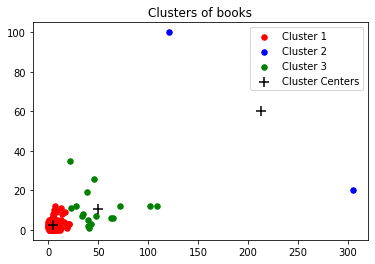

In [152]:
df_stratified=df_stratified.values
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_strat = kmeans_model.fit_predict(df_stratified)
# Visualising the clusters
plt.scatter(df_stratified[y_kmeans_strat == 0, 0], df_stratified[y_kmeans_strat == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(df_stratified[y_kmeans_strat == 1, 0], df_stratified[y_kmeans_strat == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(df_stratified[y_kmeans_strat == 2, 0], df_stratified[y_kmeans_strat == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

Kmeans cosine similarity


In [153]:
similarity_matrix_strat = cosine_similarity(df_stratified)
similarity_df_strat = pd.DataFrame(similarity_matrix_strat)
similarity_df_strat

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,1.000000,0.926113,0.908434,0.922827,0.841323,0.880995,0.838528,0.861476,0.826636,0.943737,...,0.910890,0.853622,0.911438,0.797060,0.853622,0.790451,0.789413,0.850124,0.795679,0.893372
1,0.926113,1.000000,0.998561,0.995108,0.977849,0.992300,0.977433,0.889351,0.958646,0.993969,...,0.818852,0.902395,0.822643,0.816199,0.902395,0.860954,0.888627,0.901867,0.795844,0.758770
2,0.908434,0.998561,1.000000,0.995731,0.987611,0.997498,0.984688,0.897553,0.971073,0.989593,...,0.811377,0.907812,0.813404,0.827369,0.907812,0.871840,0.901901,0.907767,0.804681,0.744115
3,0.922827,0.995108,0.995731,1.000000,0.980647,0.992015,0.967971,0.919362,0.974853,0.982469,...,0.854318,0.939404,0.859770,0.861707,0.939404,0.905675,0.926716,0.938893,0.846381,0.796555
4,0.841323,0.977849,0.987611,0.980647,1.000000,0.996233,0.991282,0.905949,0.990567,0.960514,...,0.774540,0.908546,0.771476,0.844841,0.908546,0.889260,0.926223,0.910102,0.815534,0.687153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.790451,0.860954,0.871840,0.905675,0.889260,0.882381,0.832430,0.944648,0.937583,0.820371,...,0.894087,0.992807,0.905195,0.956769,0.992807,1.000000,0.994499,0.993913,0.961641,0.846109
161,0.789413,0.888627,0.901901,0.926716,0.926223,0.915631,0.877831,0.950010,0.964825,0.849844,...,0.867857,0.987433,0.874710,0.949519,0.987433,0.994499,1.000000,0.989290,0.945289,0.804913
162,0.850124,0.901867,0.907767,0.938893,0.910102,0.911615,0.862065,0.950674,0.947789,0.868227,...,0.917157,0.999779,0.929971,0.948828,0.999779,0.993913,0.989290,1.000000,0.953880,0.875947
163,0.795679,0.795844,0.804681,0.846381,0.815534,0.812116,0.748671,0.969767,0.874035,0.773706,...,0.951503,0.953845,0.940439,0.995148,0.953845,0.961641,0.945289,0.953880,1.000000,0.898966


In [154]:
df_stratified=new_X.groupby('Catégorie', group_keys=False).apply(lambda x: x.sample(55))
df_stratified=df_stratified.T.iloc[0:7]
df_stratified=df_stratified.T
df_stratified

,Apprécié,Neutre,Moins_Apprécié,Nombre_Votes,"(overall, mean)","(overall, std)","(overall, median)"
0060170409,8.0,1.0,1.0,10.0,4.1,0.994429,4.0
0060953071,7.0,0.0,0.0,7.0,4.857143,0.377964,5.0
0060507365,34.0,12.0,7.0,53.0,3.867925,1.160864,4.0
0060171030,6.0,0.0,0.0,6.0,4.833333,0.408248,5.0
0060692014,21.0,1.0,1.0,23.0,4.521739,0.947224,5.0
...,...,...,...,...,...,...,...
0060876123,2.0,3.0,0.0,5.0,3.8,1.095445,3.0
0060512474,3.0,4.0,1.0,8.0,3.375,1.30247,3.0
0060854995,5.0,8.0,0.0,13.0,3.461538,0.660225,3.0
0060150866,2.0,4.0,1.0,7.0,3.142857,0.690066,3.0


In [155]:

scaler = StandardScaler()
X_cos_strat = scaler.fit_transform(similarity_df_strat)

Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

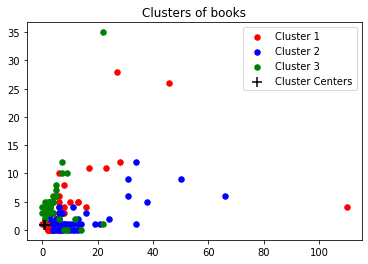

In [156]:
# Training the KMeans model with n_clusters=5
df_stratified1=df_stratified.values
kmeans_cos_strat = KMeans(n_clusters=3, init='k-means++', random_state=42)
cos_kmeans_strat = kmeans_cos_strat.fit_predict(similarity_df_strat)
# Visualising the clusters
plt.scatter(df_stratified1[cos_kmeans_strat == 0, 0], df_stratified1[cos_kmeans_strat == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(df_stratified1[cos_kmeans_strat == 1, 0], df_stratified1[cos_kmeans_strat == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(df_stratified1[cos_kmeans_strat == 2, 0], df_stratified1[cos_kmeans_strat == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_cos_strat.cluster_centers_[:, 0], y=kmeans_cos_strat.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

Kmeans avec PCA


In [157]:
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
X_PCA_strat= df_stratified.values
X_std_strat = StandardScaler().fit_transform(X_PCA_strat)

pca_strat = PCA(n_components=2)
X_PCA_strat = pca_strat.fit_transform(X_std_strat)
x_pca_strat = pca_strat.fit_transform(X_std_strat)

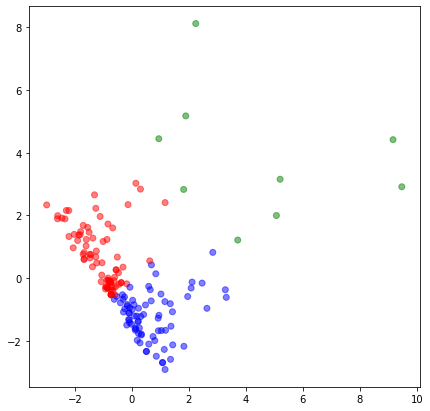

In [158]:
# Set a 3 KMeans clustering
kmeans_strat = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered_strat = kmeans_strat.fit_predict(x_pca_strat)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered_strat]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_pca_strat[:,0],x_pca_strat[:,1], c= label_color, alpha=0.5) 
plt.show()



 K-means avec similarité cosinus et PCA






In [159]:
cos_X_PCA_strat= similarity_df_strat.values
cos_X_std_strat = StandardScaler().fit_transform(cos_X_PCA_strat)

cos_pca_strat = PCA(n_components=2)
cos_x_pca_strat = cos_pca_strat.fit_transform(cos_X_std_strat)

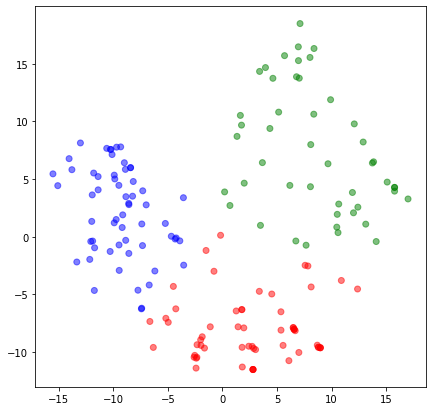

In [160]:
# Set a 3 KMeans clustering
cos_kmeans_strat = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
cos_X_clustered_strat = cos_kmeans_strat.fit_predict(cos_x_pca_strat)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in cos_X_clustered_strat]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(cos_x_pca_strat[:,0],cos_x_pca_strat[:,1], c= label_color, alpha=0.5) 
plt.show()

In [161]:
labels1=cos_kmeans_strat.labels_
len(labels1)

165

Clustering spectral PCA


In [162]:
from sklearn.preprocessing import StandardScaler
X_PCA_sim_strat= df_stratified.values
X_std_sim_strat = StandardScaler().fit_transform(X_PCA_sim_strat)

pca = PCA(n_components=2)
x_pca_sim_strat = pca.fit_transform(X_std_sim_strat)

In [163]:
x1_strat=x_pca_sim_strat
x1_strat
x1_strat = pd.DataFrame(x1_strat)
x1_strat=x1_strat.T
x1_strat

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,-1.263518,-2.602047,1.820501,-2.608433,-1.264315,-0.838155,-1.008329,-1.55174,-1.902730,-0.133140,...,-0.760708,0.628685,-0.445309,0.413279,-0.597399,-0.850464,-0.258003,-0.309627,-0.647179,0.087643
1,0.679903,1.992217,2.829824,1.893546,2.228207,1.727699,1.169749,1.62103,1.199489,2.345476,...,-0.122549,0.552205,-0.195616,-1.160111,-0.528727,-0.315406,-0.599111,0.350762,-0.295645,-1.207658


In [164]:
#Matrice de similarite euclidienne


df_euclid_pca_strat = pd.DataFrame(1 / (1 + distance_matrix(x1_strat.T, x1_strat.T)),
    columns=df_stratified.index, index=df_stratified.index
)
df_euclid_pca_strat

,0060170409,0060953071,0060507365,0060171030,0060692014,0060888598,0007223706,006084616X,0060890460,000651412X,...,006053110X,0060740582,0060757361,0060889454,0060088591,0060876123,0060512474,0060854995,0060150866,0060974451
0060170409,1.000000,0.347884,0.210109,0.355675,0.392418,0.469297,0.644192,0.503963,0.548321,0.331903,...,0.513619,0.345243,0.454890,0.286579,0.420162,0.481321,0.380671,0.497740,0.464267,0.301085
0060953071,0.347884,1.000000,0.181780,0.910019,0.424018,0.359245,0.357983,0.473044,0.486121,0.286201,...,0.262877,0.220404,0.245570,0.186488,0.236920,0.256601,0.222508,0.261815,0.249421,0.193045
0060507365,0.210109,0.181780,1.000000,0.180936,0.241375,0.257862,0.233647,0.218229,0.197452,0.331919,...,0.203185,0.280065,0.209212,0.191175,0.194614,0.195072,0.199612,0.234273,0.200714,0.185404
0060171030,0.355675,0.910019,0.180936,1.000000,0.419260,0.359967,0.362819,0.478179,0.502559,0.284397,...,0.267757,0.222024,0.249546,0.188822,0.241064,0.261567,0.225935,0.265356,0.253857,0.195722
0060692014,0.392418,0.424018,0.241375,0.419260,1.000000,0.603370,0.478704,0.598168,0.452342,0.467894,...,0.293764,0.283421,0.281021,0.209167,0.260658,0.279559,0.249933,0.321933,0.277916,0.213116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060876123,0.481321,0.256601,0.195072,0.261567,0.279559,0.328608,0.401039,0.326850,0.351556,0.266250,...,0.824593,0.368348,0.702991,0.396816,0.751326,1.000000,0.603542,0.538193,0.830397,0.435793
0060512474,0.380671,0.222508,0.199612,0.225935,0.249933,0.294287,0.342299,0.280144,0.290932,0.253342,...,0.590775,0.407633,0.692113,0.533380,0.742602,0.603542,1.000000,0.512485,0.669565,0.588285
0060854995,0.497740,0.261815,0.234273,0.265356,0.321933,0.404059,0.481572,0.360148,0.356496,0.333055,...,0.604656,0.510284,0.639806,0.373844,0.519380,0.538193,0.512485,1.000000,0.578290,0.383398
0060150866,0.464267,0.249421,0.200714,0.253857,0.277916,0.329779,0.398527,0.320574,0.338708,0.270953,...,0.828497,0.394962,0.816131,0.422268,0.807534,0.830397,0.669565,0.578290,1.000000,0.460573


In [165]:
#Decomposition 
from numpy import linalg as LA
w_pca_strat, v_pca_strat = LA.eig(df_euclid_pca_strat)
v_pca_strat
D_pca_strat=np.diag(w_pca_strat)

In [166]:
#Decomposition de la matrice en P √ D(P √ D) T
from numpy.linalg import *

D_pca_strat=np.sqrt(D_pca_strat)


F_pca_strat=np.dot(v_pca_strat,D_pca_strat)
H_pca_strat=np.dot(D_pca_strat,v_pca_strat.T)

P_pca_start=np.dot(F_pca_strat,H_pca_strat)
D_pca_strat,P_pca_start

(array([[7.96087081e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 4.03520255e+00+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 3.35978386e+00+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        ...,
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         6.62839453e-09+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 5.05664829e-09+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 3.96096965e-09+0.j]]),
 array([[1.        -1.39491449e-64j, 0.34788402-1.14882540e-63j,
         0.21010911-2.30846948e-64j, ..., 0.4977404 +1.1

In [167]:
f_strat=np.dot(v_pca_strat,D_pca_strat)
f_strat

array([[ 6.35055518e-01+0.j, -4.30287770e-01+0.j, -1.47506386e-01+0.j,
        ..., -1.02466445e-24+0.j,  3.89387617e-24+0.j,
         2.49361259e-24+0.j],
       [ 4.13996305e-01+0.j, -3.43721445e-01+0.j, -3.68095488e-01+0.j,
        ...,  7.22853027e-26+0.j, -1.10133859e-24+0.j,
        -6.77662182e-25+0.j],
       [ 3.21750047e-01+0.j, -5.46833608e-02+0.j, -1.63894736e-01+0.j,
        ...,  3.08371113e-25+0.j, -4.66501894e-25+0.j,
        -4.69626964e-25+0.j],
       ...,
       [ 6.80559714e-01+0.j, -1.84034342e-01+0.j,  1.18617574e-01+0.j,
        ..., -5.75625457e-25+0.j,  6.62966685e-25+0.j,
         2.82875087e-25+0.j],
       [ 7.89278089e-01+0.j, -1.47280670e-01+0.j,  4.14857892e-01+0.j,
        ...,  2.00860504e-24+0.j, -5.81762539e-24+0.j,
        -4.20920681e-24+0.j],
       [ 7.19030717e-01+0.j,  4.00888523e-01+0.j, -2.24168325e-02+0.j,
        ...,  1.51320337e-25+0.j, -2.99199076e-24+0.j,
        -2.17827775e-24+0.j]])

In [168]:
#P √ D
f_strat=f_strat.astype(float)
f_strat=pd.DataFrame(f_strat,columns=df_euclid_pca_strat.columns,index=df_euclid_pca_strat.index)
f_strat
DF3_pca_strat=pd.DataFrame(f_strat,columns=f_strat.columns,index=f_strat.columns)
DF3_pca_strat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


,0060170409,0060953071,0060507365,0060171030,0060692014,0060888598,0007223706,006084616X,0060890460,000651412X,...,006053110X,0060740582,0060757361,0060889454,0060088591,0060876123,0060512474,0060854995,0060150866,0060974451
0060170409,0.635056,-0.430288,-0.147506,0.014105,-0.130411,-0.357925,-0.004756,-0.063010,0.039009,0.082236,...,-3.610660e-24,-1.145241e-24,-1.145241e-24,0.0,2.541265e-24,2.541265e-24,0.0,-1.024664e-24,3.893876e-24,2.493613e-24
0060953071,0.413996,-0.343721,-0.368095,0.133609,0.067494,0.447549,0.125393,0.092369,-0.217961,0.257932,...,-5.789619e-24,2.907057e-25,2.907057e-25,0.0,6.972284e-25,6.972284e-25,0.0,7.228530e-26,-1.101339e-24,-6.776622e-25
0060507365,0.321750,-0.054683,-0.163895,-0.185005,0.219344,0.080363,-0.322548,-0.155772,0.085122,0.007925,...,-5.290724e-25,1.742038e-25,1.742038e-25,0.0,-7.934918e-25,-7.934918e-25,0.0,3.083711e-25,-4.665019e-25,-4.696270e-25
0060171030,0.419739,-0.348911,-0.368517,0.136883,0.060231,0.432423,0.135678,0.085714,-0.215223,0.251285,...,5.100215e-25,-4.634248e-26,-4.634248e-26,0.0,-4.564867e-24,-4.564867e-24,0.0,-2.121565e-25,2.300637e-25,-6.074150e-25
0060692014,0.451370,-0.335141,-0.337978,0.034084,0.126702,0.193942,-0.206556,0.093062,0.098648,-0.178599,...,-3.133116e-24,5.924199e-26,5.924199e-26,0.0,1.908929e-24,1.908929e-24,0.0,-5.516838e-25,2.088079e-25,9.497476e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060876123,0.774334,-0.189250,0.407010,-0.082040,-0.138645,0.125426,0.015424,-0.114866,-0.095133,-0.139847,...,2.772322e-09,-1.290351e-10,-1.290351e-10,0.0,2.073261e-09,2.073261e-09,0.0,-4.226797e-10,7.937595e-10,5.241337e-10
0060512474,0.764371,0.100665,0.255381,0.126802,0.183246,0.054401,0.121815,0.006211,0.230727,0.052982,...,4.488761e-23,-1.543877e-24,-1.543877e-24,0.0,2.111450e-23,2.111450e-23,0.0,-3.884275e-24,8.354529e-24,5.333400e-24
0060854995,0.680560,-0.184034,0.118618,-0.147351,0.087762,-0.124313,-0.144784,0.272997,0.029750,0.178006,...,1.812366e-24,-1.171693e-25,-1.171693e-25,0.0,1.867823e-24,1.867823e-24,0.0,-5.756255e-25,6.629667e-25,2.828751e-25
0060150866,0.789278,-0.147281,0.414858,-0.074924,-0.055547,0.121394,0.021390,-0.014963,-0.006668,-0.061996,...,-9.870622e-24,1.174133e-24,1.174133e-24,0.0,-1.601903e-23,-1.601903e-23,0.0,2.008605e-24,-5.817625e-24,-4.209207e-24


In [169]:
DFF_pca_strat=DF3_pca_strat.T.iloc[0:2]
DF9_pca_strat=DFF_pca_strat.T
DF9_pca_strat['dim1'] = DF9_pca_strat.T.iloc[0].astype(float, errors = 'raise')
DF9_pca_strat['dim2'] = DF9_pca_strat.T.iloc[1].astype(float, errors = 'raise')
PD_euc_pca_strat=DF9_pca_strat.loc[:,['dim1','dim2']]
PD_euc_pca_strat

,dim1,dim2
0060170409,0.635056,-0.430288
0060953071,0.413996,-0.343721
0060507365,0.321750,-0.054683
0060171030,0.419739,-0.348911
0060692014,0.451370,-0.335141
...,...,...
0060876123,0.774334,-0.189250
0060512474,0.764371,0.100665
0060854995,0.680560,-0.184034
0060150866,0.789278,-0.147281


Visualisation spectral avec distance euclidienne


Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

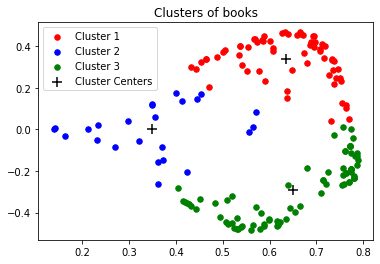

In [170]:
# Training the KMeans model with n_clusters=3
PD_euc_pca_strat=PD_euc_pca_strat.values
kmeans_sp_eucl_strat = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_sp_eucl_strat = kmeans_sp_eucl_strat.fit_predict(PD_euc_pca_strat)


plt.scatter(PD_euc_pca_strat[labels_sp_eucl_strat == 0, 0], PD_euc_pca_strat[labels_sp_eucl_strat== 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(PD_euc_pca_strat[labels_sp_eucl_strat == 1, 0], PD_euc_pca_strat[labels_sp_eucl_strat == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(PD_euc_pca_strat[labels_sp_eucl_strat == 2, 0], PD_euc_pca_strat[labels_sp_eucl_strat == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_sp_eucl_strat.cluster_centers_[:, 0], y=kmeans_sp_eucl_strat.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

Cosinus


In [171]:
#Cosine similarity matrix
import scipy as sp
M_cosine_pca_strat = np.zeros((x1_strat.shape[1],x1_strat.shape[1]))

#Iterate through DataFrame columns to measure euclidean distance
for i in range(x1_strat.shape[1]):
    u1_strat= x1_strat[x1_strat.columns[i]]
    for j in range(x1_strat.shape[1]):
        v1_strat= x1_strat[x1_strat.columns[j]]
        #Euclidean distance -> Euclidean similarity
        M_cosine_pca_strat[i,j] = (1/(1+sp.spatial.distance.cosine(u1_strat,v1_strat)))
DF_cosine_pca_strat = pd.DataFrame(M_cosine_pca_strat,columns=df_stratified.index,index=df_stratified.index)
DF_cosine_pca_strat

,0060170409,0060953071,0060507365,0060171030,0060692014,0060888598,0007223706,006084616X,0060890460,000651412X,...,006053110X,0060740582,0060757361,0060889454,0060088591,0060876123,0060512474,0060854995,0060150866,0060974451
0060170409,1.000000,0.987424,0.481249,0.991081,0.867087,0.840829,0.937972,0.953506,0.997639,0.677048,...,0.829206,0.425729,0.722368,0.364712,0.604367,0.746760,0.479177,0.941631,0.716378,0.394267
0060953071,0.987424,1.000000,0.521287,0.999675,0.926418,0.903762,0.979306,0.988334,0.995883,0.741805,...,0.761735,0.455503,0.658960,0.352222,0.552999,0.681696,0.445574,0.981554,0.653429,0.375405
0060507365,0.481249,0.521287,1.000000,0.514462,0.651232,0.675908,0.582666,0.566056,0.497712,0.839620,...,0.374825,0.962923,0.352909,0.383044,0.337550,0.357180,0.334850,0.578854,0.351918,0.357190
0060171030,0.991081,0.999675,0.514462,1.000000,0.917693,0.894269,0.974026,0.984219,0.997864,0.731198,...,0.772508,0.450383,0.668738,0.353987,0.560743,0.691793,0.450557,0.976530,0.663122,0.378144
0060692014,0.867087,0.926418,0.651232,0.917693,1.000000,0.997929,0.981343,0.970441,0.893889,0.906055,...,0.605654,0.556540,0.526879,0.335017,0.453130,0.543561,0.384080,0.979083,0.522873,0.344450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060876123,0.746760,0.681696,0.357180,0.691793,0.543561,0.525318,0.605618,0.623894,0.718244,0.435915,...,0.981323,0.340842,0.998277,0.503250,0.936822,1.000000,0.763481,0.609681,0.997317,0.581038
0060512474,0.479177,0.445574,0.334850,0.450557,0.384080,0.376831,0.410269,0.418416,0.463993,0.345475,...,0.683326,0.344437,0.788344,0.788931,0.913155,0.763481,1.000000,0.412063,0.794533,0.898809
0060854995,0.941631,0.981554,0.578854,0.976530,0.979083,0.964661,0.999931,0.999186,0.961192,0.823723,...,0.682183,0.499384,0.589754,0.341494,0.499674,0.609681,0.412063,1.000000,0.584943,0.357701
0060150866,0.716378,0.653429,0.351918,0.663122,0.522873,0.505859,0.581109,0.598379,0.688641,0.423137,...,0.965339,0.338111,0.999893,0.522516,0.958329,0.997317,0.794533,0.584943,1.000000,0.605543


Decomposition en P √ D(P √ D) T


In [172]:
from numpy import *
from numpy.linalg import *
w2_pca_strat, v2_pca_strat = LA.eig(DF_cosine_pca_strat)
v2_pca_strat=v2_pca_strat.astype(float)
D2_pca_strat=diag(w2_pca_strat)
D2_pca_strat=np.sqrt(D2_pca_strat)


F2_pca_strat=np.dot(v2_pca_strat,D2_pca_strat)
H2_pca_strat=np.dot(D2_pca_strat,v2_pca_strat.T)

P2_pca_strat=np.dot(F2_pca_strat,H2_pca_strat)
DF7_pca_strat = pd.DataFrame(F2_pca_strat,columns=df_stratified.index,index=df_stratified.index)
DF7_pca_strat
#DF72 = pd.DataFrame(F2,columns=['000100039X','0001055178'],index=x.columns)
#print(DF7.loc[:,['000100039X','0001055178']])
DF72_pca_strat=DF7_pca_strat.T.iloc[0:2]
DF72_pca_strat=DF72_pca_strat.T
DF72_pca_strat
#DF72[0].astype(float, errors = 'raise')
DF72_pca_strat['dim1'] = DF72_pca_strat.T.iloc[0].astype(float, errors = 'raise')
DF72_pca_strat['dim2'] = DF72_pca_strat.T.iloc[1].astype(float, errors = 'raise')
PD_cos_pca_strat=DF72_pca_strat.loc[:,['dim1','dim2']]
PD_cos_pca_strat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,dim1,dim2
0060170409,0.798627,-0.564059
0060953071,0.780026,-0.570881
0060507365,0.592394,-0.101481
0060171030,0.783260,-0.571117
0060692014,0.719372,-0.508295
...,...,...
0060876123,0.839628,-0.239527
0060512474,0.842302,0.273128
0060854995,0.752549,-0.553423
0060150866,0.840202,-0.195569


Spectral avec cosine similarity


Text(0.5, 1.0, 'Clusters\xa0of\xa0books')

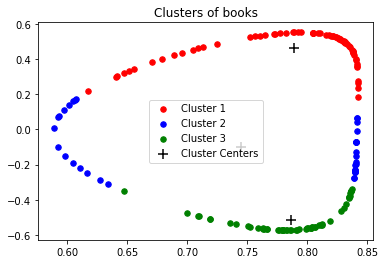

In [173]:
PD_cos_pca_strat=PD_cos_pca_strat.values
kmeans_sp_cosi_strat = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_sp_cosi_strat = kmeans_sp_cosi_strat.fit_predict(PD_cos_pca_strat)
labels_sp_cosi_strat

plt.scatter(PD_cos_pca_strat[labels_sp_cosi_strat == 0, 0], PD_cos_pca_strat[labels_sp_cosi_strat== 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(PD_cos_pca_strat[labels_sp_cosi_strat == 1, 0], PD_cos_pca_strat[labels_sp_cosi_strat == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(PD_cos_pca_strat[labels_sp_cosi_strat == 2, 0], PD_cos_pca_strat[labels_sp_cosi_strat == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x=kmeans_sp_cosi_strat.cluster_centers_[:, 0], y=kmeans_sp_cosi_strat.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of books')

In [174]:
#silouhette

#KMEANS,euc
labels1_strat=X_clustered_strat
X_Silouhaitte_km_strat= df_stratified
km_strat = KMeans(n_clusters=3, random_state=42)
km_strat.fit_predict(X_Silouhaitte_km_strat)
silouette_km_euc_strat = silhouette_score(X_Silouhaitte_km_strat, labels1_strat, metric='euclidean')

print('Score Silhouette pour KMeans avec distance euclidienne stratified : %.3f' % silouette_km_euc_strat)
#KMEANS,cos


silouette_km_cos_strat= silhouette_score(X_cos_strat,cos_X_clustered_strat, metric='cosine')

print('Score Silhouette pour KMeans avec similarité cosinus stratified : %.3f' % silouette_km_cos_strat)

#SPECTRAL,euc

X_Silouhaitte_Sp_strat = PD_euc_pca_strat
silouette_sp_euc_strat = silhouette_score(X_Silouhaitte_Sp_strat, labels_sp_eucl_strat, metric='euclidean')

print('Score Silhouette pour Spectral pour distance euclidienne stratified: %.3f' % silouette_sp_euc_strat)

#SPECTRAL,cos
X_Silouhaitte_Sp_cos_strat = PD_cos_pca_strat
silouette_sp_cos_strat= silhouette_score(X_Silouhaitte_Sp_cos_strat, labels_sp_cosi_strat, metric='cosine')

print('Score Silhouette pour spectral evce similarité cosinus stratified : %.3f' % silouette_sp_cos_strat)


Score Silhouette pour KMeans avec distance euclidienne stratified : 0.149
Score Silhouette pour KMeans avec similarité cosinus stratified : 0.579
Score Silhouette pour Spectral pour distance euclidienne stratified: 0.530
Score Silhouette pour spectral evce similarité cosinus stratified : 0.783


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [175]:
#info mutuelle StandardScaler
import sklearn
#kmeans,euc
labels_true_strat=df_stratified_info_mutu['Catégorie']
InfoMut_km_euc_strat=sklearn.metrics.normalized_mutual_info_score(labels_true_strat, y_kmeans_strat,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec distance euclidienne stratified : %.3f' % InfoMut_km_euc_strat)
#kmeans,cos
InfoMut_km_cos_strat=sklearn.metrics.normalized_mutual_info_score(labels_true_strat, cos_X_clustered_strat,average_method='arithmetic')
print('Score Info Mutuelle pour KMeans avec similarité cosinus stratified : %.3f' % InfoMut_km_cos_strat)



#SP,euc
labels_true_strat=df_stratified_info_mutu['Catégorie']
InfoMut_sp_euc_strat=sklearn.metrics.normalized_mutual_info_score(labels_true_strat, labels_sp_eucl_strat ,average_method='arithmetic')
print('Score Info Mutuelle pour Spectral avec distance euclidienne stratified : %.3f' % InfoMut_sp_euc_strat)
#SP,cos
InfoMut_sp_cos_strat=sklearn.metrics.normalized_mutual_info_score(labels_true_strat, labels_sp_cosi_strat,average_method='arithmetic')
print('Score Info Mutuelle pour Spectral avec similarité cosinus stratified : %.3f' % InfoMut_sp_cos_strat)

Score Info Mutuelle pour KMeans avec distance euclidienne stratified : 0.061
Score Info Mutuelle pour KMeans avec similarité cosinus stratified : 0.715
Score Info Mutuelle pour Spectral avec distance euclidienne stratified : 0.350
Score Info Mutuelle pour Spectral avec similarité cosinus stratified : 0.387


In [176]:
#Qualité.=pd.DataFrame(columns=['Silouette','Info.Mut'])
Qualité_strat=pd.DataFrame(index = ['Kmeans','Spectral'],columns=['Distance euclidienne_Siloutte_strat','Distance euclidienne_IonfoMut_strat','Similarité cosinus_Silouette_strat','Similarité cosinus_InfoMut_strat'])
Qualité_strat['Distance euclidienne_Siloutte_strat']=[silouette_km_euc_strat,silouette_sp_euc_strat]
Qualité_strat['Similarité cosinus_Silouette_strat']=[silouette_km_cos_strat,silouette_sp_cos_strat]
Qualité_strat['Distance euclidienne_IonfoMut_strat']=[InfoMut_km_euc_strat,InfoMut_sp_euc_strat]
Qualité_strat['Similarité cosinus_InfoMut_strat']=[InfoMut_km_cos_strat,InfoMut_sp_cos_strat]
Qualité_strat

,Distance euclidienne_Siloutte_strat,Distance euclidienne_IonfoMut_strat,Similarité cosinus_Silouette_strat,Similarité cosinus_InfoMut_strat
Kmeans,0.148626,0.060553,0.578970,0.714529
Spectral,0.530158,0.350051,0.782888,0.386526


**Question 4** : Voir rapport